In [ ]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples

%matplotlib inline

from importlib import reload
plt=reload(plt)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
print(datetime.datetime.now())

2021-08-15 06:43:41.533303


In [ ]:
!which python

/usr/local/bin/python


In [ ]:
!python --version

Python 3.7.11


In [ ]:
!echo $PYTHONPATH

/env/python


In [ ]:
# TODO: install any packages you need to here. For example:
#pip install unidecode

# Question 1: Uncle Steve's Diamonds

## Instructions

You work at a local jewelry store named *Uncle Steve's Diamonds*. You started as a janitor, but you’ve recently been promoted to senior data analyst! Congratulations.

Uncle Steve, the store's owner, needs to better understand the store's customers. In particular, he wants to know what kind of customers shop at the store. He wants to know the main types of *customer personas*. Once he knows these, he will contemplate ways to better market to each persona, better satisfy each persona, better cater to each persona, increase the loyalty of each persona, etc. But first, he must know the personas.

You want to help Uncle Steve. Using sneaky magic (and the help of Environics), you've collected four useful features for a subset of the customers: age, income, spending score (i.e., a score based on how much they’ve spent at the store in total), and savings (i.e., how much money they have in their personal bank account). 

**Your tasks**

1. Pick a clustering algorithm (the [`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) module has many good choices, including [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN), and [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) (aka Hierarchical). (Note that another popular implementation of the hierarchical algorithm can be found in SciPy's [`scipy.cluster.hierarchy.linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).) Don't spend a lot of time thinking about which algorithm to choose - just pick one. Cluster the customers as best as you can, within reason. That is, try different feature preprocessing steps, hyperparameter values, and/or distance metrics. You don't need to try every single posssible combination, but try a few at least. Measure how good each  model configuration is by calculating an internal validation metric (e.g., [`calinski_harabasz_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html) or [`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)).
2. You have some doubts - you're not sure if the algorithm you chose in part 1 is the best algorithm for this dataset/problem. Neither is Uncle Steve. So, choose a different algorithm (any!) and do it all again.
3. Which clustering algorithm is "better" in this case? Think about charateristics of the algorithm like quality of results, ease of use, speed, interpretability, etc. Choose a winner and justify to Uncle Steve.
4. Interpret the clusters of the winning model. That is, describe, in words, a *persona* that accurately depicts each cluster. Use statistics (e.g., cluster means/distributions), examples (e.g., exemplar instances from each cluster), and/or visualizations (e.g., relative importance plots, snakeplots) to get started. Human judgement and creativity will be necessary. This is where it all comes together. Be descripive and *help Uncle Steve understand his customers better*. Please!

**Marking**

The coding parts (i.e., 1 and 2) will be marked based on:

- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) are able to run this Notebook again and again, from top to bottom, and get the same results each time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.


Parts 3 and 4 will be marked on:

- *Quality*. Response is well-justified and convincing. Responses uses facts and data where possible.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.


**Tips**

- Since clustering is an unsupervised ML technique, you don't need to split the data into training/validation/test or anything like that. Phew!
- On the flip side, since clustering is unsupervised, you will never know the "true" clusters, and so you will never know if a given algorithm is "correct." There really is no notion of "correctness" - only "usefullness."
- Many online clustering tutorials (including some from Uncle Steve) create flashy visualizations of the clusters by plotting the instances on a 2-D graph and coloring each point by the cluster ID. This is really nice and all, but it can only work if your dataset only has exactly two features - no more, no less. This dataset has more than two features, so you cannot use this technique. (But that's OK - you don't need to use this technique.) 
- Must you use all four features in the clustering? Not necessarily, no. But "throwing away" quality data, for no reason, is unlikely to improve a model.
- Some people have success applying a dimensionality reduction technique (like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)) to the features before clustering. You may do this if you wish, although it may not be as helpful in this case because there are only four features to begin with.
- If you apply a transformation (e.g., [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) or [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)) to the features before clustering, you may have difficulty interpretting the means of the clusters (e.g., what is a mean Age of 0.2234??). There are two options to fix this: first, you can always reverse a transformation with the `inverse_transform` method. Second, you can just use the original dataset (i.e., before any prepropoceesing) during the interpreation step.
- You cannot change the distance metric for K-Means. (This is for theoretical reasons: K-Means only works/makes sense with Euclidean distance.


## 1.0: Load data 

In [ ]:
# DO NOT MODIFY THIS CELL
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [ ]:

df1.describe().transpose()
df1.head()

,count,mean,std,min,25%,50%,75%,max
Age,505.0,59.019802,24.140043,17.0,34.000000,59.000000,85.000000,97.0
Income,505.0,75513.291089,35992.922184,12000.0,34529.000000,75078.000000,107100.000000,142000.0
SpendingScore,505.0,0.505083,0.259634,0.0,0.304792,0.368215,0.768279,1.0
Savings,505.0,11862.455867,4949.229253,0.0,6828.709702,14209.932802,16047.268331,20000.0


,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


EDA

In [ ]:
# Default plot settings
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16


plt.rc('figure', figsize=[8.0, 5.0])     # controls the size of the figure
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('axes', grid=True)

In [ ]:
#Change datatypes

df1["Age"] = df1["Age"].astype(float)
df1["Income"] = df1["Income"].astype(float)
df1.dtypes

Age              float64
Income           float64
SpendingScore    float64
Savings          float64
dtype: object

In [ ]:
#Check the Null value

df1.isnull().any()

Age              False
Income           False
SpendingScore    False
Savings          False
dtype: bool

In [ ]:
#Create a duplicate copy
X = df1.copy()
col_names = df1.columns

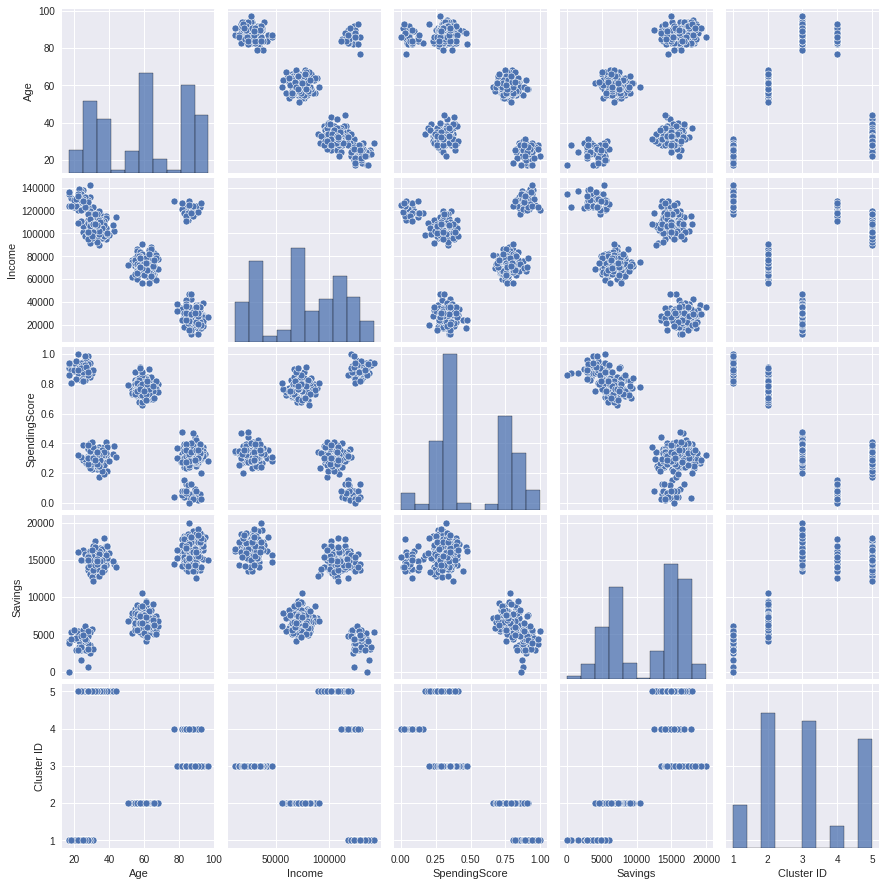

In [ ]:
# Plots of all features using seaborn
import seaborn as sns
sns.pairplot(df1)

[Text(0.5, 0, 'Age'),
 Text(1.5, 0, 'Income'),
 Text(2.5, 0, 'SpendingScore'),
 Text(3.5, 0, 'Savings'),
 Text(4.5, 0, 'Cluster ID')]

(5.01, -0.01)

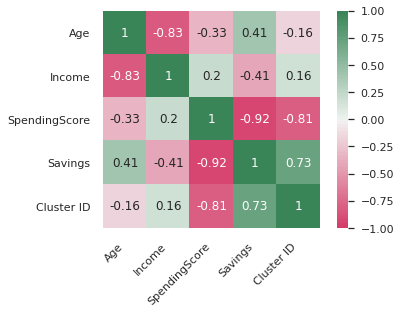

In [ ]:

### Visual EDA ###

# additional imports
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # for plot stlying.

#show correlation matrix as heatmap
corr = df1.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 500, n=100),
    annot = True,
    square=True
)

##cmap=sns.diverging_palette(20, 220, n=200),
    
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
        
ax.set_ylim(len(df1.columns)+0.01, -0.01)  #to get around a display bug in seaborn.

Normalize data

In [ ]:
#Create a duplicate copy
X = df1.copy()
X.head()
scaler = StandardScaler()
X = scaler.fit_transform(X)
X[0:10,]

,Age,Income,SpendingScore,Savings
0,58.0,77769.0,0.791329,6559.829923
1,59.0,81799.0,0.791082,5417.661426
2,62.0,74751.0,0.702657,9258.992965
3,59.0,74373.0,0.765680,7346.334504
4,87.0,17760.0,0.348778,16869.507130


array([[-4.22871323e-02,  6.27330450e-02,  1.10359261e+00,
        -1.07246676e+00],
       [-8.21109365e-04,  1.74810526e-01,  1.10264136e+00,
        -1.30347264e+00],
       [ 1.23576959e-01, -2.11999168e-02,  7.61727378e-01,
        -5.26555609e-01],
       [-8.21109365e-04, -3.17123951e-02,  1.00470466e+00,
        -9.13394630e-01],
       [ 1.16022753e+00, -1.60616460e+00, -6.02618775e-01,
         1.01268619e+00],
       [-1.24480180e+00,  1.55920380e+00,  1.31835884e+00,
        -1.68414067e+00],
       [-2.08151224e-01,  2.74411535e-02,  1.07995544e+00,
        -1.00793738e+00],
       [ 1.16022753e+00, -9.15567087e-01, -5.77511904e-01,
         1.25878240e+00],
       [ 9.94363441e-01, -1.14383804e+00, -6.95375294e-01,
         5.90762597e-01],
       [ 1.03582946e+00, -1.32992004e+00, -5.32121174e-01,
         1.21697119e+00]])

Visualization

Text(0.5, 0, 'Income)')

Text(0, 0.5, 'SpendingScore')

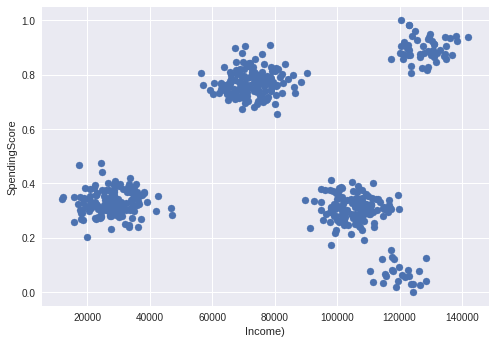

In [ ]:
plt.close()
plt.style.use('seaborn')
plt.scatter(df1['Income'], df1['SpendingScore'])
plt.xlabel('Income)')
plt.ylabel('SpendingScore')

Text(0.5, 0, 'Savings)')

Text(0, 0.5, 'SpendingScore')

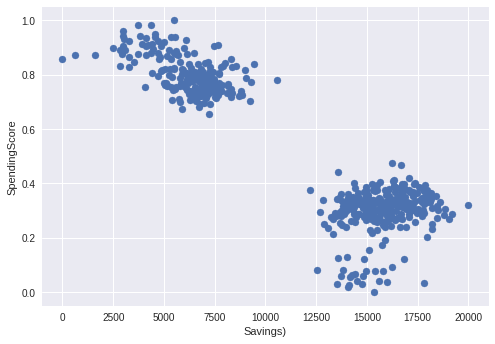

In [ ]:
plt.close()
plt.style.use('seaborn')
plt.scatter(df1['Savings'], df1['SpendingScore'])
plt.xlabel('Savings)')
plt.ylabel('SpendingScore')
plt.title = 'Saving vs Spending'

In [ ]:

#Dimensionality reduction
reduction_pca = PCA(n_components=4)
reduced_features = reduction_pca.fit_transform(df1)

## 1.1: Clustering Algorithm #1

K-Means Clustering

In [ ]:
k_means = KMeans(n_clusters=5, random_state=42)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
k_means.labels_

array([2, 2, 2, 2, 0, 3, 2, 0, 0, 0, 4, 1, 1, 1, 2, 4, 2, 0, 0, 4, 1, 4,
       2, 0, 4, 3, 3, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 0, 3, 2,
       2, 3, 4, 3, 1, 2, 0, 1, 3, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 3, 3, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 3, 2, 4, 2, 0, 0, 1, 1, 2,
       2, 2, 2, 2, 3, 0, 2, 3, 1, 2, 2, 1, 1, 3, 1, 3, 1, 0, 0, 1, 1, 2,
       0, 1, 2, 1, 1, 1, 2, 1, 3, 0, 1, 0, 0, 0, 1, 4, 2, 0, 2, 2, 1, 2,
       1, 2, 3, 0, 4, 3, 2, 1, 0, 2, 2, 3, 2, 3, 2, 4, 2, 0, 2, 1, 0, 2,
       0, 4, 1, 2, 0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2,
       2, 0, 0, 0, 2, 2, 1, 3, 3, 0, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 3, 1,
       0, 0, 0, 1, 2, 1, 2, 1, 2, 0, 3, 2, 0, 0, 0, 0, 2, 0, 1, 3, 1, 0,
       2, 2, 1, 0, 1, 3, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 1, 1, 3, 2,
       2, 2, 4, 2, 1, 0, 3, 3, 3, 0, 2, 1, 0, 0, 1, 1, 2, 2, 4, 2, 2, 0,
       2, 0, 1, 3, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 2, 2, 0, 1, 1, 4, 1, 0,
       0, 1, 4, 0, 0, 3, 2, 1, 1, 2, 1, 0, 0, 1, 2,

## 1.2: Clustering Algorithm #2


Hierarchical Clustering

In [ ]:
agg = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
agg.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)

In [ ]:
agg.labels_

array([1, 1, 1, 1, 0, 3, 1, 0, 0, 0, 4, 2, 2, 2, 1, 4, 1, 0, 0, 4, 2, 4,
       1, 0, 4, 3, 3, 1, 0, 1, 1, 1, 0, 1, 2, 1, 0, 1, 2, 2, 1, 0, 3, 1,
       1, 3, 4, 3, 2, 1, 0, 2, 3, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 3, 3, 1, 1, 2, 0, 0, 2, 1, 2, 1, 1, 3, 1, 4, 1, 0, 0, 2, 2, 1,
       1, 1, 1, 1, 3, 0, 1, 3, 2, 1, 1, 2, 2, 3, 2, 3, 2, 0, 0, 2, 2, 1,
       0, 2, 1, 2, 2, 2, 1, 2, 3, 0, 2, 0, 0, 0, 2, 4, 1, 0, 1, 1, 2, 1,
       2, 1, 3, 0, 4, 3, 1, 2, 0, 1, 1, 3, 1, 3, 1, 4, 1, 0, 1, 2, 0, 1,
       0, 4, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 2, 3, 3, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 3, 2,
       0, 0, 0, 2, 1, 2, 1, 2, 1, 0, 3, 1, 0, 0, 0, 0, 1, 0, 2, 3, 2, 0,
       1, 1, 2, 0, 2, 3, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 2, 2, 3, 1,
       1, 1, 4, 1, 2, 0, 3, 3, 3, 0, 1, 2, 0, 0, 2, 2, 1, 1, 4, 1, 1, 0,
       1, 0, 2, 3, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 2, 2, 4, 2, 0,
       0, 2, 4, 0, 0, 3, 1, 2, 2, 1, 2, 0, 0, 2, 1,

## 1.3 Model Comparison

In [ ]:
#Evaluate the K-Mean
silhouette_score(X, k_means.labels_)

0.8048976287755765

In [ ]:
#Evaluate the Hierarchical Clustering
silhouette_score(X, agg.labels_)

0.8048976287755765

Elbow method to determine no of clusters

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'K-Means, Elbow Method')

Text(0.5, 0, 'Number of clusters, K')

Text(0, 0.5, 'Inertia')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'K-Means, Elbow Method')

Text(0.5, 0, 'Number of clusters, K')

Text(0, 0.5, 'Silhouette')

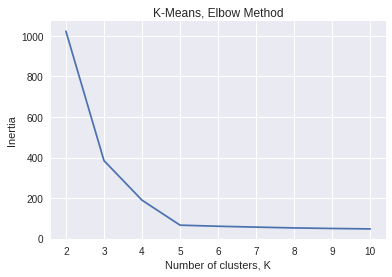

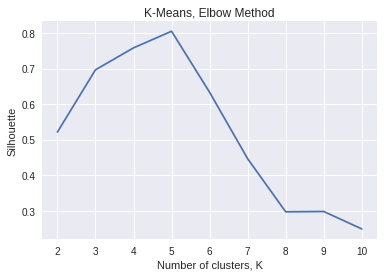

In [ ]:
#Run the Elbow Model
inertias = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(X, kmeans.labels_, metric='euclidean')
    

plt.figure();
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");


plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette")

ANALYSIS: Above, the number of clusters is arguably between 4 or 5 inclusive. Let's call it five, since five is still an acceptably small number of clusters for a store clerk to have to remember. For thoroughness, I will do the K-means clustering with k=2, k=3, k=4, and k=5 for comparison purposes.

Hyperameter Tuning

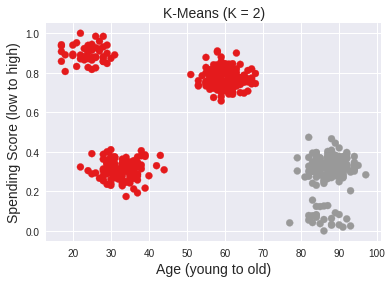

In [ ]:
#from sklearn.cluster import KMeans

cluster = 2

kmeans_model = KMeans(n_clusters=cluster, init='k-means++', 
                max_iter=300, n_init=10, random_state=0)

pred_y = kmeans_model.fit_predict(X)

#graph using the original data for ease of interpretation of axes
plt.scatter(df1.iloc[:,0], 
            df1.iloc[:,2], c=kmeans_model.labels_ ,             
            cmap="Set1")

plt.title("K-Means (K = " + str(cluster) + ")" , fontsize=14);
plt.xlabel('Age (young to old)', fontsize=14);
plt.ylabel('Spending Score (low to high)', fontsize=14);

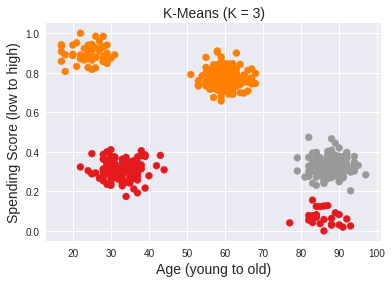

In [ ]:

#from sklearn.cluster import KMeans

cluster = 3

kmeans_model = KMeans(n_clusters=cluster, init='k-means++', 
                max_iter=300, n_init=10, random_state=0)

pred_y = kmeans_model.fit_predict(X)

#graph using the original data for ease of interpretation of axes
plt.scatter(df1.iloc[:,0], 
            df1.iloc[:,2], c=kmeans_model.labels_ ,             
            cmap="Set1")

plt.title("K-Means (K = " + str(cluster) + ")" , fontsize=14);
plt.xlabel('Age (young to old)', fontsize=14);
plt.ylabel('Spending Score (low to high)', fontsize=14);

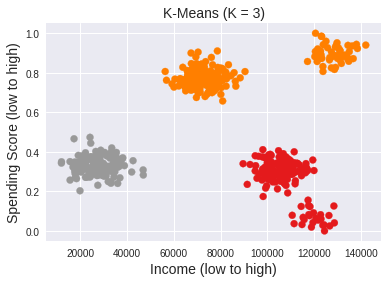

In [ ]:
#from sklearn.cluster import KMeans

#cluster = 3

# Draw a fresh graph (using same K=3 clusters) showing SpendingScore vs Income

#graph using the original data for ease of interpretation of axes
plt.scatter(df1.iloc[:,1], 
            df1.iloc[:,2], c=kmeans_model.labels_ ,             
            cmap="Set1")

plt.title("K-Means (K = " + str(cluster) + ")" , fontsize=14);
plt.xlabel('Income (low to high)', fontsize=14);
plt.ylabel('Spending Score (low to high)', fontsize=14);

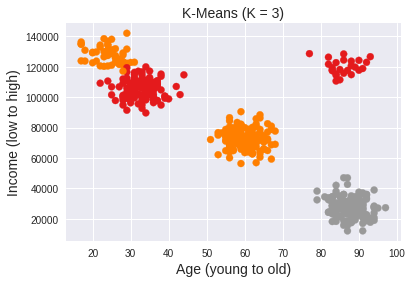

In [ ]:
#from sklearn.cluster import KMeans

# Finally, draw a fresh graph (using SAME K=3 clusters) to show Income vs Age (two axes) and the Clusters (colored)

#graph using the original data for ease of interpretation of axes
plt.scatter(df1.iloc[:,0], 
            df1.iloc[:,1], c=kmeans_model.labels_ ,             
            cmap="Set1")

plt.title("K-Means (K = " + str(cluster) + ")" , fontsize=14);
plt.xlabel('Age (young to old)', fontsize=14);
plt.ylabel('Income (low to high)', fontsize=14);


ANALYSIS: From the three graphs above we see that from the first two (SpendingScore vs Age and SpendingScore vs Income) that the 'Orange cluster' is the highest spending cluster - that is, the TARGET cluster - with the other two clusters ('red' and 'grey' being lower spenders).

The TARGET cluster are formed by two groups: young people with the highest incomes (120K and above).

The two non-target clusters are old people and young people with, more standard incomes (90K-120K)

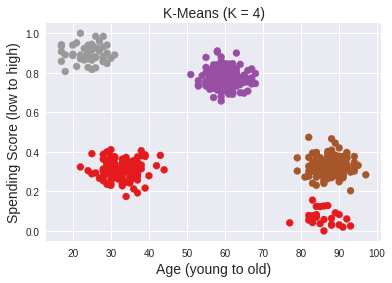

In [ ]:
#from sklearn.cluster import KMeans

cluster = 4

kmeans_model = KMeans(n_clusters=cluster, init='k-means++', 
                max_iter=300, n_init=10, random_state=0)

pred_y = kmeans_model.fit_predict(X)

#graph using the original data for ease of interpretation of axes
plt.scatter(df1.iloc[:,0], 
            df1.iloc[:,2], c=kmeans_model.labels_ ,             
            cmap="Set1")

plt.title("K-Means (K = " + str(cluster) + ")" , fontsize=14);
plt.xlabel('Age (young to old)', fontsize=14);
plt.ylabel('Spending Score (low to high)', fontsize=14);

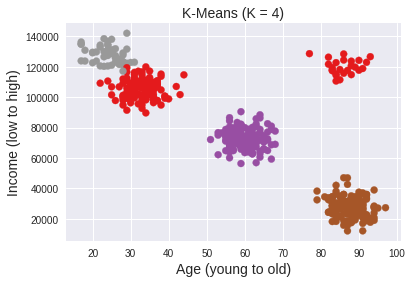

In [ ]:
## Re-draw using k=4 but change the axes

#graph using the original data for ease of interpretation of axes
plt.scatter(df1.iloc[:,0], 
            df1.iloc[:,1], c=kmeans_model.labels_ ,             
            cmap="Set1")

plt.title("K-Means (K = " + str(cluster) + ")" , fontsize=14);
plt.xlabel('Age (young to old)', fontsize=14);
plt.ylabel('Income (low to high)', fontsize=14);

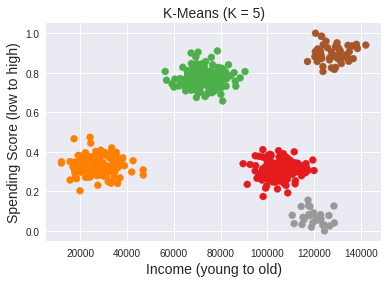

In [ ]:

#from sklearn.cluster import KMeans

cluster = 5

kmeans_model = KMeans(n_clusters=cluster, init='k-means++', 
                max_iter=300, n_init=10, random_state=0)

pred_y = kmeans_model.fit_predict(X)

#graph using the original data for ease of interpretation of axes
plt.scatter(df1.iloc[:,1], 
            df1.iloc[:,2], c=kmeans_model.labels_ ,             
            cmap="Set1")

plt.title("K-Means (K = " + str(cluster) + ")" , fontsize=14);
plt.xlabel('Income (young to old)', fontsize=14);
plt.ylabel('Spending Score (low to high)', fontsize=14);

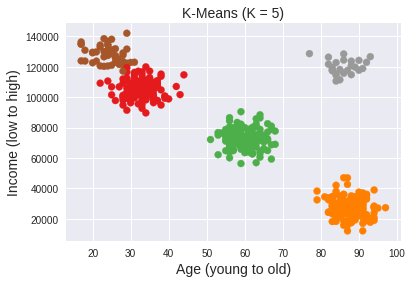

In [ ]:
#graph using the original data for ease of interpretation of axes
plt.scatter(df1.iloc[:,0], 
            df1.iloc[:,1], c=kmeans_model.labels_ ,             
            cmap="Set1")

plt.title("K-Means (K = " + str(cluster) + ")" , fontsize=14);
plt.xlabel('Age (young to old)', fontsize=14);
plt.ylabel('Income (low to high)', fontsize=14);


ANALYSIS: In conclusions, With K=4 and K=5 cluster are the same about what the 'target class' of consumer: "young and high-paid" or "middle-aged". The additional clusters shows the breakdown of groups within non-target classes, but this adds no further value. K=2 isnt enough to distinguish who is highSpending and lowSpending. Therefore, K=3 is best for describing customers

#Winner Model

Hierarchical cluster is better for this case problem because

*   Works well with Small Dataset
*   Can Detects "non-circular" shapes
*   Easily can view clusters at various granularities
*   More Flexible



## 1.4 Personas

In [ ]:
#Load the Hierarchy Model
import scipy.cluster

aggl = scipy.cluster.hierarchy.linkage(X, method='ward', metric='euclidean')


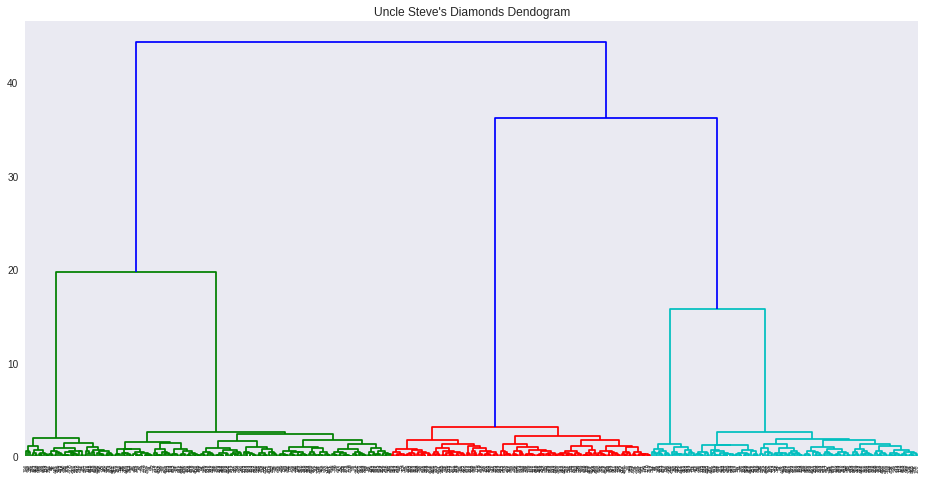

In [ ]:
import scipy.cluster


# Plot the dendogram
plt.figure(figsize=(16, 8));
plt.grid(False)
plt.title("Uncle Steve's Diamonds Dendogram");  
dend = scipy.cluster.hierarchy.dendrogram(aggl);

Based on the analysis, Horizontal line between 0 and 10 covers all the cluster and cluster 5 providing the best optimum performance. If we look at the dendogram, number of cluster are more near distance metric 2 but optimum perfomance objective will not be achieve.

In [ ]:

# Let's find K=5 clusters
K=5
cluster_labels = scipy.cluster.hierarchy.fcluster(aggl, K, criterion="maxclust")

In [ ]:
#View the cluster
df1['Cluster ID'] = cluster_labels
df1.head(9)

,Age,Income,SpendingScore,Savings,Cluster ID
0,58.0,77769.0,0.791329,6559.829923,2
1,59.0,81799.0,0.791082,5417.661426,2
2,62.0,74751.0,0.702657,9258.992965,2
3,59.0,74373.0,0.765680,7346.334504,2
4,87.0,17760.0,0.348778,16869.507130,3
5,29.0,131578.0,0.847034,3535.514352,1
6,54.0,76500.0,0.785198,6878.884249,2
7,87.0,42592.0,0.355290,18086.287158,3
8,83.0,34384.0,0.324719,14783.379086,3


In [ ]:
#Show Each Cluster feature Means
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

means = np.zeros((K, X.shape[1]))

for i, label in enumerate(set(cluster_labels)):
    means[i,:] = X[cluster_labels==label].mean(axis=0)
    print('\nCluster {} (n={}):'.format(label, sum(cluster_labels==label)))
    print(scaler.inverse_transform(means[i,:]))
    
means


Cluster 1 (n=50):
[    24.18 128029.12      0.9    4087.52]

Cluster 2 (n=157):
[   59.96 72448.06     0.77  6889.97]

Cluster 3 (n=147):
[   87.78 27866.1      0.33 16659.26]

Cluster 4 (n=25):
[    86.   119944.04      0.07  14808.68]

Cluster 5 (n=126):
[    32.78 105265.81      0.31  14962.78]


array([[-1.44,  1.46,  1.51, -1.57],
       [ 0.04, -0.09,  1.03, -1.01],
       [ 1.19, -1.33, -0.68,  0.97],
       [ 1.12,  1.24, -1.68,  0.6 ],
       [-1.09,  0.83, -0.75,  0.63]])

In [ ]:
#Show Each Cluster feature Stats
from scipy import stats

pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

def stats_to_df(d, scaler):
    tmp_df = pd.DataFrame(columns=col_names)
    
    tmp_df.loc[0] = scaler.inverse_transform(d.minmax[0])
    tmp_df.loc[1] = scaler.inverse_transform(d.mean)
    tmp_df.loc[2] = scaler.inverse_transform(d.minmax[1])
    tmp_df.loc[3] = scaler.inverse_transform(d.variance)
    tmp_df.loc[4] = scaler.inverse_transform(d.skewness)
    tmp_df.loc[5] = scaler.inverse_transform(d.kurtosis)
    tmp_df.index = ['Min', 'Mean', 'Max', 'Variance', 'Skewness', 'Kurtosis'] 
    return tmp_df.T

print('All Data:')
print('Number of Instances: {}'.format(X.shape[0]))
d = stats.describe(X, axis=0)
display(stats_to_df(d, scaler))

for i, label in enumerate(set(cluster_labels)):
    d = stats.describe(X[cluster_labels==label], axis=0)
    print('\nCluster {}:'.format(label))
    print('Number of Instances: {}'.format(d.nobs))
    display(stats_to_df(d, scaler))


All Data:
Number of Instances: 505


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,17.00,59.02,97.00,83.18,57.56,24.79
Income,12000.00,75513.29,142000.00,111541.90,70425.76,30539.63
SpendingScore,0.00,0.51,1.00,0.76,0.57,0.14
Savings,0.00,11862.46,20000.00,16816.59,10068.59,4685.19



Cluster 1:
Number of Instances: 50


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,17.00,24.18,31.00,59.58,49.02,45.82
Income,117108.00,128029.12,142000.00,76413.35,86686.66,52197.55
SpendingScore,0.81,0.90,1.00,0.51,0.55,0.44
Savings,0.00,4087.52,6089.48,12192.66,6842.94,18038.91



Cluster 2:
Number of Instances: 157


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,51.00,59.96,68.00,59.49,63.48,52.66
Income,56321.00,72448.06,90422.00,76596.27,80762.80,76774.09
SpendingScore,0.66,0.77,0.91,0.51,0.61,0.58
Savings,4077.66,6889.97,10547.78,12086.41,13179.50,14336.46



Cluster 3:
Number of Instances: 147


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,79.00,87.78,97.00,59.53,58.71,47.69
Income,12000.00,27866.10,46977.00,76669.86,80132.22,81449.08
SpendingScore,0.20,0.33,0.47,0.51,0.59,0.63
Savings,13470.97,16659.26,20000.00,12145.91,11114.44,11991.20



Cluster 4:
Number of Instances: 25


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,77.00,86.00,93.00,59.58,56.77,58.46
Income,110582.00,119944.04,128596.00,76192.26,76326.08,48538.51
SpendingScore,0.00,0.07,0.16,0.51,0.62,0.36
Savings,12554.69,14808.68,17833.09,12134.30,14948.38,14021.13



Cluster 5:
Number of Instances: 126


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,22.00,32.78,44.00,59.62,62.86,66.99
Income,89598.00,105265.81,119877.00,76541.57,76634.13,64585.25
SpendingScore,0.17,0.31,0.41,0.51,0.45,0.51
Savings,12207.53,14962.78,17968.55,12090.45,12134.49,10963.23


Cluster 1 : This group called 'Young Target' customer who make and spend the most. 



Cluster 2: This group might call "Adult Target" customer who earn reasonable amount and spend lot. Uncle Steve might target this customer group.

Cluster 3: This group might call "Adult Standard" customer who earn lot and follow spending plan. This customer group also follow the saving plan.

Cluster 4: This customer group earn lot but spend less. So We might call "Senior Frugal" customer group.This group also a super saver.

Cluster 5: This customer group earn lot and spend is reasonable. So, We can call "Adult Sensible" customer group.Also, This customer group are saver.

In [ ]:
#Compute distance between each pair 

from scipy.spatial import distance

for i, label in enumerate(set(cluster_labels)):
    X_tmp= X
    exemplar_idx = distance.cdist([means[i]], X).argmin()
   
    print('\nCluster {}:'.format(label))
    #print("  Examplar ID: {}".format(exemplar_idx))
    #print("  Label: {}".format(labels[exemplar_idx]))
    #print("  Features:")
    display(df1.iloc[[exemplar_idx]])


Cluster 1:


,Age,Income,SpendingScore,Savings,Cluster ID
95,25.00,130934.00,0.91,3942.39,1



Cluster 2:


,Age,Income,SpendingScore,Savings,Cluster ID
467,61.00,72027.00,0.76,6926.12,2



Cluster 3:


,Age,Income,SpendingScore,Savings,Cluster ID
335,89.00,26940.00,0.33,16555.16,3



Cluster 4:


,Age,Income,SpendingScore,Savings,Cluster ID
155,86.00,115689.00,0.06,14803.15,4



Cluster 5:


,Age,Income,SpendingScore,Savings,Cluster ID
405,34.00,103204.00,0.30,15149.81,5


**Cluster 1:** This cluster 1 might call "Starter" group because cluster 1 is younger age group and have already a quite bit of retirment savings.

**Cluster 2:**This might call "let's hurry up cluster" group because cluster 2 is older age group and less retirment savings.

**Cluster 3:** I would say this group is "keep it going" cluster group since they are older and have some savings for retirment.

**Cluster 4:** Cluster 4 group is older and have the highest savings. I would say "Senior and Affluent" cluster group.

**Cluster 5:** This cluster group have high saving and might early stage of their career. I would say, this is "Young and affluent" Cluster group.

Overall, Hierarchical Clustering results are good and created clear buckets to distinguish high paying and low paying customers.